# Welcome !

This may be the first time using Jupyter notebooks, a great tool for reproducible research. In addition to providing a a web application for coding in Python, Julia and R (and beyond), Jupyter notebooks allow one to directly embed:

 - text;
 - figures;
 <img src="MiCM_logo.png" width="400">
 - Equations;
 $$\large Av=\lambda v$$
 
 
 - URL links towards e.g. the [Github repository](https://github.com/DylanMannKrzisnik/MiCM_W2021_Jupyter.git) housing the scripts and data needed for this workshop;
 - and so much more, like Youtube videos, PDF documents and - more relevant to this workshop - **graphs and plots for visualizing your data and results**
 

We often need to use Python *packages* to accomplish a desired task, such as embedding a webpage or Youtube video:

In [1]:
from IPython.display import IFrame

In [2]:
IFrame('https://en.wikipedia.org/wiki/Internet_meme', width=975, height=300)

# exercise: create link

In [3]:
from IPython.display import YouTubeVideo

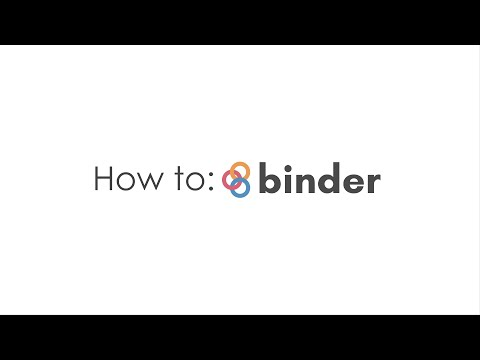

In [4]:
YouTubeVideo('owSGVOov9pQ', width=800, height=300)

## Jupyter, an interactive Python command shell (i.e. IPython)

The IPython shell offers users an interactive environment, enabling easy navigation through *directories* and access to data. We can use many of the **BASH** commands which we'd usually run in a Terminal:

<img src="BASH_terminal.png" width="800">

So, rather than listing the content of our directory by executing the *'ls'* BASH command in a Terminal, we can execute *'ls'* directly from a *code cell*:

In [5]:
ls

BASH_terminal.png                    eeg_ica.jpeg
LICENSE                              eeg_image.png
MiCM_2021_notebook.ipynb             micm_notes.txt
MiCM_2021_notebook_full.ipynb        pca_vs_ica.png
MiCM_2021_notebook_full.slides.html  requirements.txt
MiCM_logo.png                        requirements.txt~
README.md                            sub-010321_EC_downsamp.fdt
README.md~                           sub-010321_EC_downsamp.set
block_bootstrap.png


Another BASH terminal command we could try is the *cat* command to display the content of a file:

In [6]:
cat README.md

# MiCM 2021 - Intro to Jupyter & BASH
Introductory MiCM workshop on Jupyter notebooks with Binder image. Workshop held on April 23, 2021.

Access Binder/Docker image by clicking on badge below:

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/DylanMannKrzisnik/MiCM_W2021_Jupyter.git/main?filepath=MiCM_2021_notebook.ipynb)


We can display messages with *echo*:

In [7]:
!echo "Hello MiCM !"

Hello MiCM !


We can create textfiles and write to them:

In [8]:
!echo "Hello MiCM !" > my_message.txt

In [9]:
ls

BASH_terminal.png                    eeg_ica.jpeg
LICENSE                              eeg_image.png
MiCM_2021_notebook.ipynb             micm_notes.txt
MiCM_2021_notebook_full.ipynb        my_message.txt
MiCM_2021_notebook_full.slides.html  pca_vs_ica.png
MiCM_logo.png                        requirements.txt
README.md                            requirements.txt~
README.md~                           sub-010321_EC_downsamp.fdt
block_bootstrap.png                  sub-010321_EC_downsamp.set


In [10]:
cat my_message.txt

Hello MiCM !


Let's now remove the textfile we've just created with *rm*:

In [11]:
rm my_message.txt

We can also verify the path to our current directory using *pwd*:

In [12]:
pwd

'/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021'

Create new (sub)directory "data" and list content of current directory. Note that some BASH commands such as *mkdir* must be preceded by *!*:

In [13]:
mkdir data

In [14]:
ls

BASH_terminal.png                    data/
LICENSE                              eeg_ica.jpeg
MiCM_2021_notebook.ipynb             eeg_image.png
MiCM_2021_notebook_full.ipynb        micm_notes.txt
MiCM_2021_notebook_full.slides.html  pca_vs_ica.png
MiCM_logo.png                        requirements.txt
README.md                            requirements.txt~
README.md~                           sub-010321_EC_downsamp.fdt
block_bootstrap.png                  sub-010321_EC_downsamp.set


Move EEG data into "data" subdirectory using *mv* and list content of current directory (can use tab completion). We will be using this EEG data as an exercise later on:

In [15]:
mv sub-010321_EC_downsamp.fdt data/

In [16]:
ls

BASH_terminal.png                    data/
LICENSE                              eeg_ica.jpeg
MiCM_2021_notebook.ipynb             eeg_image.png
MiCM_2021_notebook_full.ipynb        micm_notes.txt
MiCM_2021_notebook_full.slides.html  pca_vs_ica.png
MiCM_logo.png                        requirements.txt
README.md                            requirements.txt~
README.md~                           sub-010321_EC_downsamp.set
block_bootstrap.png


We can also use *wildcards* for referring to files with a known structure to their filename:

In [17]:
mv *set data

In [18]:
ls

BASH_terminal.png                    block_bootstrap.png
LICENSE                              data/
MiCM_2021_notebook.ipynb             eeg_ica.jpeg
MiCM_2021_notebook_full.ipynb        eeg_image.png
MiCM_2021_notebook_full.slides.html  micm_notes.txt
MiCM_logo.png                        pca_vs_ica.png
README.md                            requirements.txt
README.md~                           requirements.txt~


Files can be copied into other directories (under new names even):

In [19]:
cp README.md data

In [20]:
ls

BASH_terminal.png                    block_bootstrap.png
LICENSE                              data/
MiCM_2021_notebook.ipynb             eeg_ica.jpeg
MiCM_2021_notebook_full.ipynb        eeg_image.png
MiCM_2021_notebook_full.slides.html  micm_notes.txt
MiCM_logo.png                        pca_vs_ica.png
README.md                            requirements.txt
README.md~                           requirements.txt~


You can target which directory should have its content listed:

In [21]:
ls data

README.md                   sub-010321_EC_downsamp.set
sub-010321_EC_downsamp.fdt


In [22]:
rm data/README.md

In [23]:
cp README.md data/readme.md

In [24]:
ls data

readme.md                   sub-010321_EC_downsamp.set
sub-010321_EC_downsamp.fdt


Navigate to "data" using *cd* and display new location with *pwd*. Then, list content of current directory (which is now "data"):

In [25]:
cd data/

/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021/data


In [26]:
pwd

'/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021/data'

In [27]:
ls

readme.md                   sub-010321_EC_downsamp.set
sub-010321_EC_downsamp.fdt


Navigate back to previous directory and verify that now in proper directory:

In [28]:
cd ..

/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021


In [29]:
pwd

'/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021'

Whenever you forget where you had moved the data, use the terminal *find* command to retrieve its location:

In [30]:
!find . -name sub*

./data/sub-010321_EC_downsamp.fdt
./data/sub-010321_EC_downsamp.set


**Warning!** Using BASH terminal commands can be tricky at times. For instance, this series of commands should work just fine:

In [31]:
ls

BASH_terminal.png                    block_bootstrap.png
LICENSE                              data/
MiCM_2021_notebook.ipynb             eeg_ica.jpeg
MiCM_2021_notebook_full.ipynb        eeg_image.png
MiCM_2021_notebook_full.slides.html  micm_notes.txt
MiCM_logo.png                        pca_vs_ica.png
README.md                            requirements.txt
README.md~                           requirements.txt~


In [32]:
cd data

/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021/data


In [33]:
ls

readme.md                   sub-010321_EC_downsamp.set
sub-010321_EC_downsamp.fdt


In [34]:
cd ..

/Users/dmannk/OneDrive - McGill University/Autre/MiCM-2021


However, running all of the same commands within a common cell usually fails:

In [36]:
ls
cd data
ls
cd ..

SyntaxError: invalid syntax (<ipython-input-36-85f1f99785af>, line 2)

Adding ! helps, but may nonetheless not execute the desired commands properly:

In [ ]:
!ls
!cd data
!ls
!cd ..

## ...

Code cells can also be used to compute mathematical expressions:

In [37]:
2+3

5

In Python, the symbol for calculating powers of a number is ** (double asterisk). We can come up with a 'funky sum':

In [38]:
2**3 + 3**2

17

We may want to automate our funky sum by creating a dedicated function:

In [39]:
def funky_sum(x,y):
    
    '''
    With inputs x and y, the funky sum is computed as x**y + y**x.

    Parameters
    ----------
    x : first term
    y : second term
    '''
    
    z = x**y + y**x
    
    return z

In [40]:
funky_sum(2,3)

17

We can use *input* to query users for the value of different variables:

In [41]:
x = input('1st term of funky sum: ')
y = input('2nd term of funky sum: ')

x = int(x)
y = int(y)

funky_sum(x,y)

1st term of funky sum: 9
2nd term of funky sum: 2


593

We had also redacted some documentation for 'funky_sum' which we can display using the *\_\_doc\_\_* *attribute*:

In [42]:
print(funky_sum.__doc__)


    With inputs x and y, the funky sum is computed as x**y + y**x.

    Parameters
    ----------
    x : first term
    y : second term
    


What other attribute was created when compiling our funky_sum function?

In [43]:
dir(funky_sum)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

Let's copy funky_sum and include an additional default argument:

In [44]:

def funky_sum_offset(x,y,b=2):

    '''
    With inputs x and y, the funky sum is computed as x**y + y**x + b.

    Parameters
    ----------
    x : first term
    y : second term
    b : offset parameter (b=2 by default)
    '''

    z = x**y + y**x + b

    return z


In [45]:
funky_sum_offset(2,3)

19

Let's now try the *\_\_defaults\_\_* attribute of our new function:

In [46]:
funky_sum_offset.__defaults__

(2,)

In [47]:
funky_sum.__defaults__

In addition to *attributes*, functions also have built-in subfunctions called *methods*:

In [48]:
funky_sum.__dir__()

['__repr__',
 '__call__',
 '__get__',
 '__new__',
 '__closure__',
 '__doc__',
 '__globals__',
 '__module__',
 '__code__',
 '__defaults__',
 '__kwdefaults__',
 '__annotations__',
 '__dict__',
 '__name__',
 '__qualname__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__init__',
 '__reduce_ex__',
 '__reduce__',
 '__subclasshook__',
 '__init_subclass__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']

The *dir* function is also useful when exploring the content of a *class*. Let's create our own class to see how this is useful:

In [49]:

class funky_class():
    
    '''
    A class for using funky sums.
    '''
    
    def funky_sum(x,y):
    
        '''
        With inputs x and y, the funky sum is computed as x**y + y**x.

        Parameters
        ----------
        x : first term
        y : second term
        '''

        z = x**y + y**x

        return z
    
    
    def funky_sum_offset(x,y,b=2):

        '''
        With inputs x and y, the funky sum is computed as x**y + y**x + b.

        Parameters
        ----------
        x : first term
        y : second term
        b : offset parameter (b=2 by default)
        '''

        z = x**y + y**x + b

        return z



Let's now test our new class and its functions:

In [50]:
print(funky_class.__doc__)


    A class for using funky sums.
    


In [51]:
dir(funky_class)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'funky_sum',
 'funky_sum_offset']

In [52]:
funky_class.funky_sum(2,3)

17

In [53]:
funky_class.funky_sum_offset(2,3)

19

Let's create some *numpy arrays* for doing funky sums. First, we'll import the *numpy* package and we'll give it the shorthand name 'np':

In [54]:
import numpy as np

In [55]:
x = np.arange(0,3)

print('The elements of x are:',x)
print('Said otherwise, there are {} elements in x'.format( len(x) ))

The elements of x are: [0 1 2]
Said otherwise, there are 3 elements in x


In [56]:
y = np.random.uniform(0,1, len(x) )
print('The {} elements of y are {}'.format( len(y) , y ))

The 3 elements of y are [0.72116627 0.22931866 0.52693953]


In the same way we provided numpy with the shorthand name 'np', we provide our custom 'funky_class.funky_sum_offset' function a shorthand name as well:

In [57]:
fs = funky_class.funky_sum_offset

In [58]:
z = fs(x[0],y[0])
print('The funky sum between the first element of x (i.e. {}) and first element of y (i.e. {:.2}) is {}'.format( x[0] , y[0] , z ))

The funky sum between the first element of x (i.e. 0) and first element of y (i.e. 0.72) is 3.0


What happens if we input the full 'x' and 'y' arrays rather than just a single of their elements?

In [59]:
z = fs(x,y)
print('The funky sum between \n the elements of x (i.e. {}) \n and elements of y (i.e. {}) \n\t is {}'.format( x , y , z ))

The funky sum between 
 the elements of x (i.e. [0 1 2]) 
 and elements of y (i.e. [0.72116627 0.22931866 0.52693953]) 
	 is [3.         3.22931866 3.71853462]


One important feature of Jupyter notebooks is the ability to generate plots side-by-side with your code.

Let's plot the arrays used for doing funky sums. First we'll need to import *matplotlib.pyplot*:

In [60]:
import matplotlib.pyplot as plt

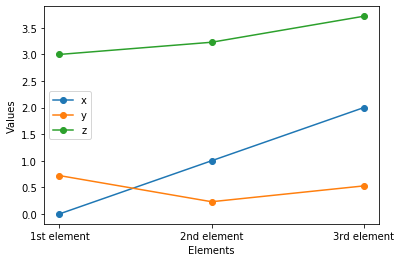

In [61]:

plt.figure()

plt.plot(x, marker='o')
plt.plot(y, marker='o')
plt.plot(z, marker='o')

plt.xticks([0,1,2], ["1st element","2nd element","3rd element"])
plt.xlabel("Elements")
plt.ylabel("Values")

plt.legend(["x","y","z"])

plt.show()


Let's now repeat the process of creating and plotting the x, y, z arrays for different offset values:

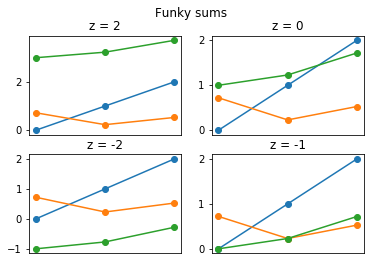

In [62]:

plt.figure()

offset = 2
z = fs(x,y, offset)
plt.subplot(2,2,1)
plt.plot(x, marker='o')
plt.plot(y, marker='o')
plt.plot(z, marker='o')
plt.xticks([])
plt.title('z = {}'.format(offset))

offset = 0
z = fs(x,y, offset)
plt.subplot(2,2,2)
plt.plot(x, marker='o')
plt.plot(y, marker='o')
plt.plot(z, marker='o')
plt.xticks([])
plt.title('z = {}'.format(offset))

offset = -2
z = fs(x,y, offset)
plt.subplot(2,2,3)
plt.plot(x, marker='o')
plt.plot(y, marker='o')
plt.plot(z, marker='o')
plt.xticks([])
plt.title('z = {}'.format(offset))

offset = -1
z = fs(x,y, offset)
plt.subplot(2,2,4)
plt.plot(x, marker='o')
plt.plot(y, marker='o')
plt.plot(z, marker='o')
plt.xticks([])
plt.title('z = {}'.format(offset))

plt.suptitle('Funky sums')

plt.show()


# EEG data analysis
 - ## EEG = electroencephalography
 EEG is an electrophysiology modality where electrodes are placed on the scalp/head to measure fluctuations in bioelectical potentials. Hence, every electrode measures a time-varying signal.
 
  <img src="eeg_image.png" width="400">
  <div style="text-align: center"> source: https://brainvision.com/applications/eeg/ </div>

Import packages for analysing EEG data

In [63]:
# Must-haves (and already imported)
import numpy as np
import matplotlib.pyplot as plt

# EEG analysis
import mne
from mne.preprocessing import ICA
from sklearn.decomposition import PCA, FastICA
from scipy.stats import zscore
from recombinator.block_bootstrap import circular_block_bootstrap as cbb
from tensorly.tenalg import khatri_rao as kr

Import EEG data using [MNE Python](https://mne.tools/stable/index.html) analysis package. We will be using open-source data which has been reported in:

[Babayan, A., Erbey, M., Kumral, D. et al. *A mind-brain-body dataset of MRI, EEG, cognition, emotion, and peripheral physiology in young and old adults.* Sci Data 6, 180308 (2019).](https://www.nature.com/articles/sdata2018308)

In [64]:
eeg = mne.io.read_raw_eeglab("data/sub-010321_EC_downsamp.set")

eeg.annotations.delete( np.arange( len(eeg.annotations.description) ) )  # remove annotations, not important

Reading data/sub-010321_EC_downsamp.fdt


<ipython-input-64-011e34792327>:1: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  eeg = mne.io.read_raw_eeglab("data/sub-010321_EC_downsamp.set")
<ipython-input-64-011e34792327>:1: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  eeg = mne.io.read_raw_eeglab("data/sub-010321_EC_downsamp.set")


Our 'eeg' is an instantiation of the class 'RawEEGLAB', which makes 'eeg' an *object*.

In [65]:
eeg

<RawEEGLAB | sub-010321_EC_downsamp.fdt, 61 x 59988 (479.9 s), ~166 kB, data not loaded>

Objects usually already have built-in methods:

In [66]:
dir(eeg)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_dtype',
 '_dtype_',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',
 '_read_segment_file',
 '_set_channel_positions',
 '_size',
 '_times',
 '_tmin_tmax_to_start_stop',


We can display useful information about the data using the *info* attribute:

In [67]:
eeg.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, T7, C3, Cz, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 61 items (61 EEG)
 highpass: 0.0 Hz
 lowpass: 62.5 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 125.0 Hz
>

For instance, we can plot the data stored in 'eeg' by calling its *plot* method:

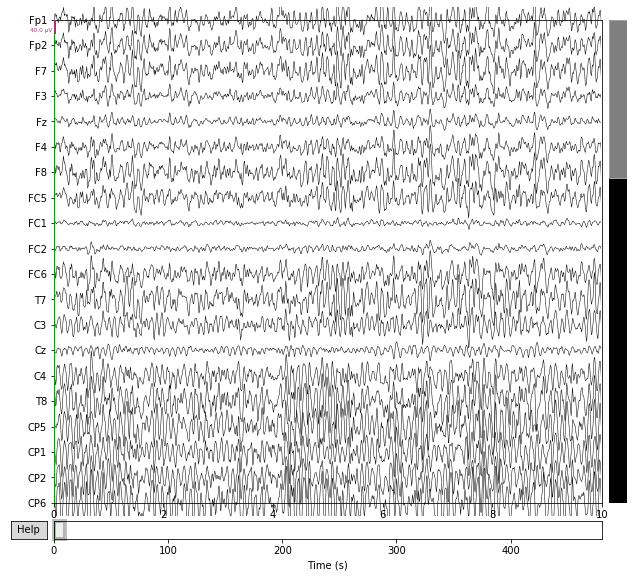

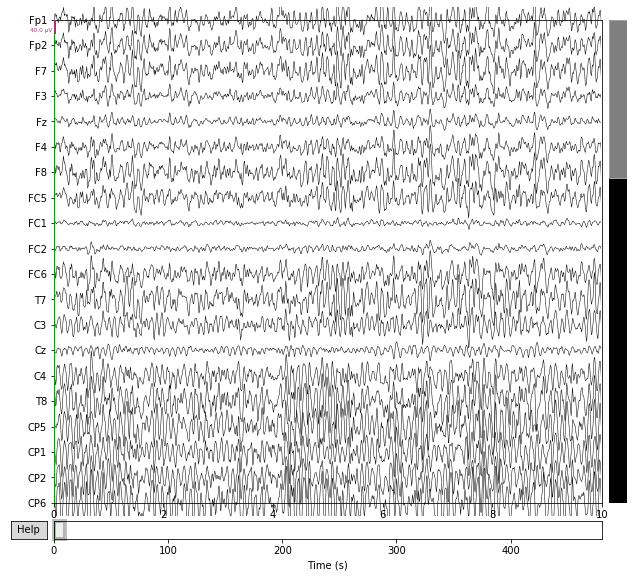

In [68]:
eeg.plot()

We can also display the documentation of the plot method to see what are the plotting options:

In [69]:
print(eeg.plot.__doc__)

Plot raw data.

    Parameters
    ----------
    events : array | None
        Events to show with vertical bars.
    duration : float
        Time window (s) to plot. The lesser of this value and the duration
        of the raw file will be used.
    start : float
        Initial time to show (can be changed dynamically once plotted). If
        show_first_samp is True, then it is taken relative to
        ``raw.first_samp``.
    n_channels : int
        Number of channels to plot at once. Defaults to 20. The lesser of
        ``n_channels`` and ``len(raw.ch_names)`` will be shown.
        Has no effect if ``order`` is 'position', 'selection' or 'butterfly'.
    bgcolor : color object
        Color of the background.
    color : dict | color object | None
        Color for the data traces. If None, defaults to::

            dict(mag='darkblue', grad='b', eeg='k', eog='k', ecg='m',
                 emg='k', ref_meg='steelblue', misc='k', stim='k',
                 resp='k', chpi='k')

In [70]:
eeg.plot.__defaults__

(None,
 10.0,
 0.0,
 20,
 'w',
 None,
 (0.8, 0.8, 0.8),
 'cyan',
 None,
 True,
 None,
 False,
 None,
 True,
 False,
 None,
 None,
 4,
 3.0,
 False,
 True,
 'type',
 False,
 'auto',
 None,
 None,
 True,
 True,
 None)

Let's isolate the default value for the 'n_channels' argument:

In [71]:
eeg.plot.__defaults__[3]

20

Let's plot our EEG data again, this time changing the number of EEG channels on display:

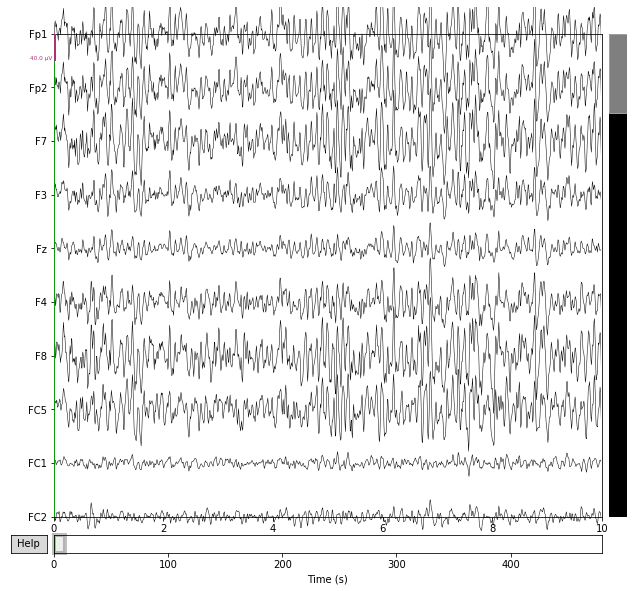

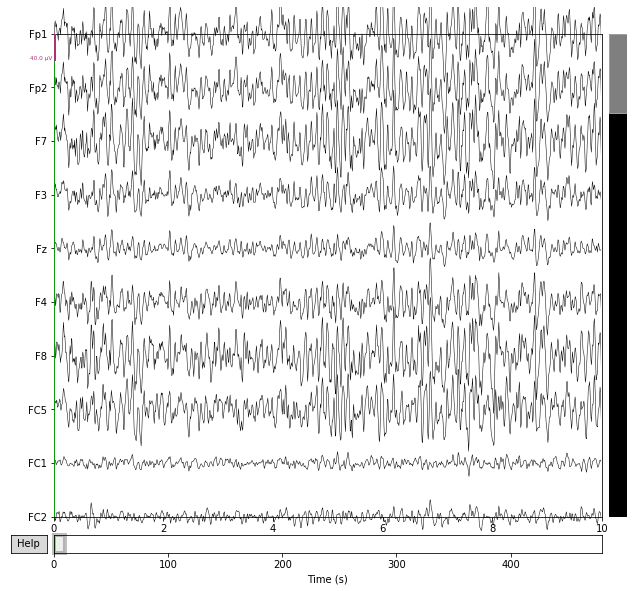

In [72]:
eeg.plot(n_channels=10)

At this point, our plots are not interactive. We can change the backend of matplotlib to render interactive plots using a *magic command*.

In [73]:
%matplotlib notebook

<IPython.core.display.Javascript object>


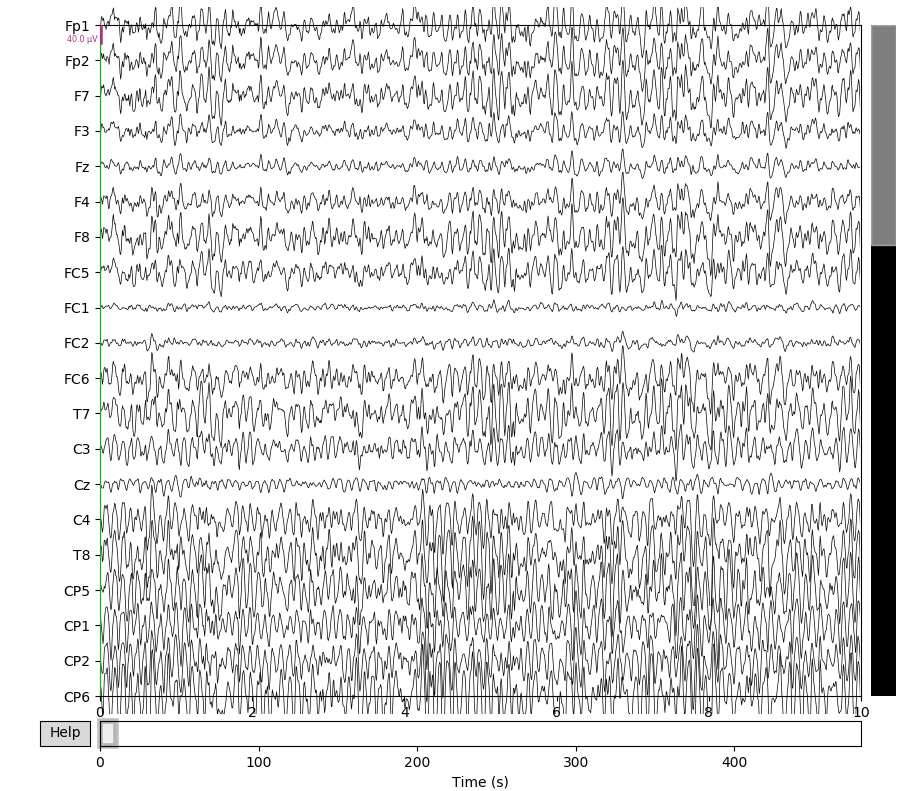

<IPython.core.display.Javascript object>

In [74]:
eeg.plot()

We can also display how are the EEG electrodes positioned on the head:

In [75]:
eeg.plot_sensors(show_names=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

From the time-series plots, it seems that many time-series are alike. Perhaps there's a way to find patterns and have a more succinct representation of our data. One way to find these patterns is to use **Independent Components Analysis** (ICA) on our EEG data.

  <img src="eeg_ica.jpeg" width="400">
  <div style="text-align: center"> source: https://sccn.ucsd.edu/~jung/Site/EEG_artifact_removal.html </div>

In [76]:
num_comps = 15  # choose number of patterns, or "components"

ica = ICA(n_components=num_comps, random_state=97)
ica.fit(eeg)

Fitting ICA to data using 61 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 1.3s.


<ICA | raw data decomposition, fit (fastica): 59988 samples, 15 components, channels used: "eeg">

The 'ica' object also contains its own built-in method for plotting the time-series of ICA components:

<IPython.core.display.Javascript object>


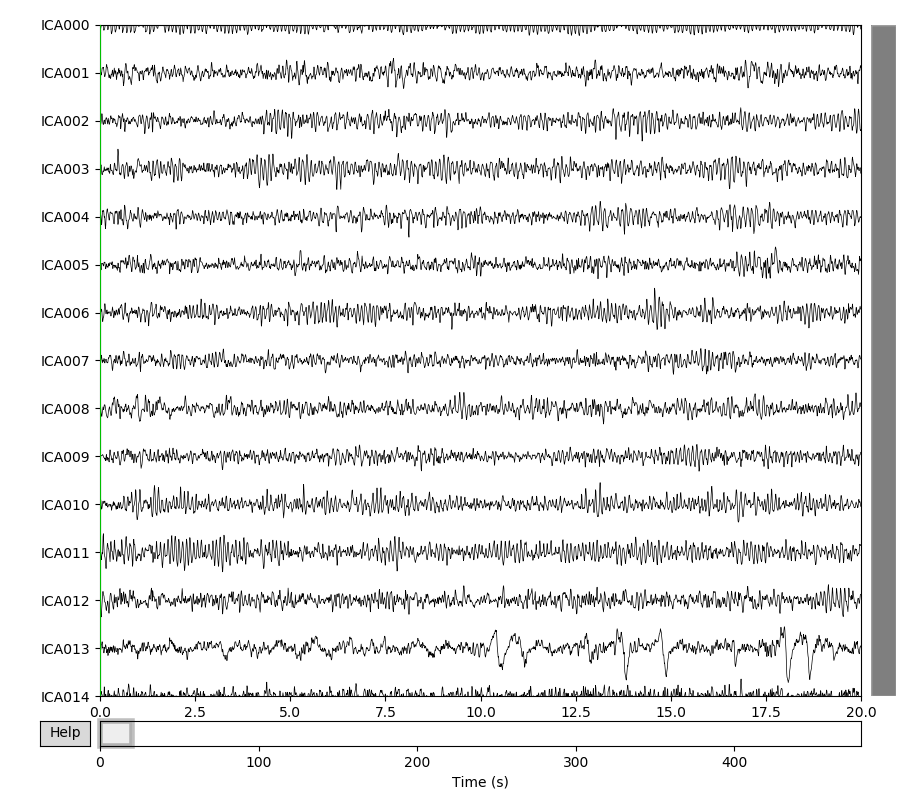

<IPython.core.display.Javascript object>

In [77]:
ica.plot_sources(eeg)

Let's also plot the *spatial topographies* of the ICA components:

<IPython.core.display.Javascript object>


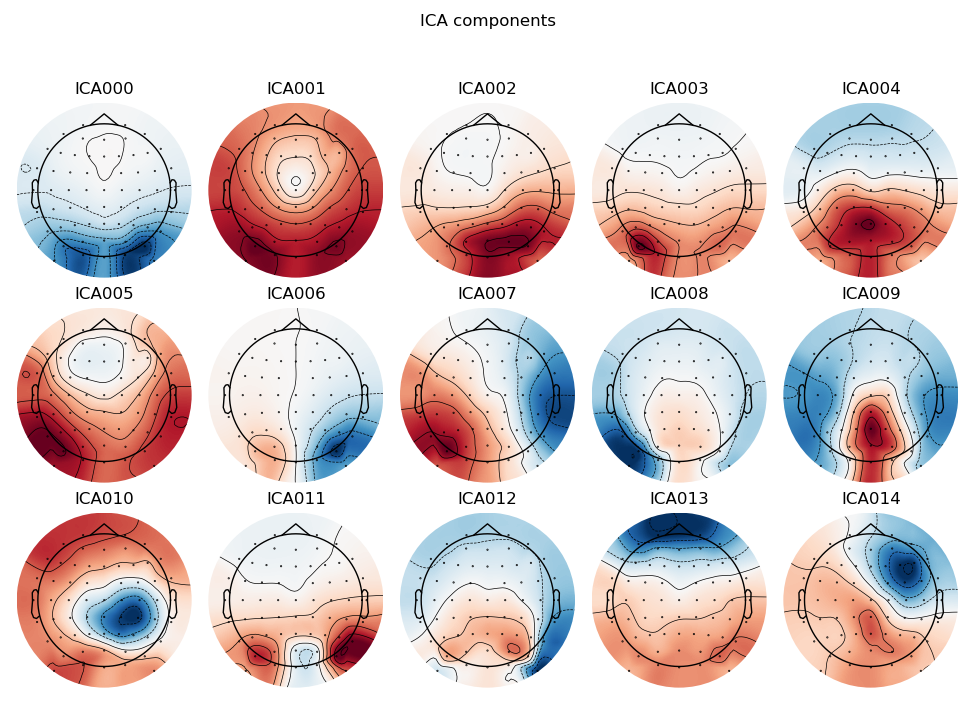

[<Figure size 975x706.5 with 15 Axes>]

In [78]:
ica.plot_components()

Now, let's also try **Principal Components Analysis** (PCA). We will need to extract the time-series from our 'eeg' object as MNE does not yet support a built-in method for PCA as it does for ICA.

  <img src="pca_vs_ica.png" width="600">
  <div style="text-align: center"> source: https://slidetodoc.com/factor-and-component-analysis-esp-principal-component-analysis/ </div>

In [79]:
eeg_ts = eeg.get_data().T

Let's display the shape of the EEG data using the built-in *shape* method for Numpy arrays:

In [80]:
print("Shape of EEG data: ", eeg_ts.shape)

Shape of EEG data:  (59988, 61)


Run PCA:

In [81]:
num_comps = 15  # choose number of patterns, or "components"

pca = PCA(n_components=num_comps)
pca_data_ts = pca.fit_transform(eeg_ts)

Plot patterns extracted by PCA (i.e. patterns of data):

In [82]:
len_plot = 1000     # choose time-series length for plotting purposes

num_plots = pca_data_ts.shape[1]
plt.figure(figsize=[9.,9.])

for i in range(num_plots):
    ax = plt.subplot( num_plots , 1, i+1 )
    plt.plot(zscore(pca_data_ts)[:len_plot,i])
    
    ax.set_ylabel("PCA {}".format(i), fontsize=8, rotation=0)
    ax.set_xticks([]); ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

It would be nice to evaluate how robust is PCA. In other words, would slight changes to the data translate into slight changes in PCA outputs, or rather lead to quite divergent results? One good way to probe the robustness of an algorithm is through *block-bootstrapping*.

<img src="block_bootstrap.png" width="400">

Let's now create our bootstrap replicates:

In [83]:
%%time

block_len = 10000  # choose size of bootstrap blocks
num_boots = 50     # choose number of bootstrap replicates

eeg_ts_boot = cbb(eeg_ts, block_len, num_boots, replace=True).transpose(1,2,0)

CPU times: user 1.8 s, sys: 476 ms, total: 2.27 s
Wall time: 2.2 s


Note: There are other useful magic commands for profiling time and memory usage. Unfortunately, installing the dependencies is not straightforward and therefore outside the scope of this worksop. You may consult [this link](https://jakevdp.github.io/PythonDataScienceHandbook/01.07-timing-and-profiling.html) for more information.

Let's plot PCA time-series before and after bootstrapping:

In [84]:
cmp = 0    # select which PCA component to plot
boot = 40  # select which bootstrap iteration to plot
len_plot = 1000

t = np.arange(len_plot) / eeg.info['sfreq']

plt.figure(figsize=[9.,3.])
plt.subplot(2,1,1); plt.plot(t, eeg_ts[:len_plot,cmp]); plt.title('Before bootstrapping'); plt.yticks([])
plt.subplot(2,1,2); plt.plot(t, eeg_ts_boot[:len_plot,cmp,boot]); plt.title('After bootstrapping'); plt.yticks([])  # can write commands side-by-side with ";" semi-colon seperator
plt.xlabel('Time (seconds)')

plt.show(); plt.tight_layout()

<IPython.core.display.Javascript object>

The fun part: repeat PCA on the bootstrap EEG data and apply learned PCA model on original EEG data:

In [85]:
pca_boot_ts = []

for boot in range(num_boots):
        
    pca_boot = PCA(n_components=num_comps)    
    pca_boot.fit(eeg_ts_boot[:,:,boot])                         # learn PCA model on bootstrap EEG data
    pca_boot_ts.append( pca_boot.transform(eeg_ts.squeeze()) )  # apply PCA model on original EEG data
    
pca_boot_ts = np.array(pca_boot_ts).transpose(1,2,0)

What does applying different bootstrap-based PCA models to the original EEG data look like?

In [86]:
cmp = 1    # select which PCA component to plot

plt.figure(figsize=[9.,3.])
plt.plot(zscore(pca_boot_ts[:len_plot,cmp,:])); plt.xticks([]); plt.yticks([])
plt.show()

# save image

<IPython.core.display.Javascript object>

Seems like we should ensure that time-series are not flipped:

In [87]:
pca_boot_ts_signcorr = pca_boot_ts.copy()

for i in range(pca_data_ts.shape[-1]):
    signs = np.corrcoef( pca_data_ts[:,i] , pca_boot_ts[:,i,:].squeeze() , rowvar=False )[0,1:]
    pca_boot_ts_signcorr[:,i,:] = kr([ signs[None] , pca_boot_ts[:,i,:].squeeze() ])

Plot again:

In [88]:
cmp = 1    # select which PCA component to plot

plt.figure(figsize=[9.,3.])
plt.plot(zscore(pca_boot_ts_signcorr[:len_plot,cmp,:])); plt.xticks([]); plt.yticks([])
plt.show()

<IPython.core.display.Javascript object>

Let's now compute the mean and standard deviation across bootstrap iterations for each PCA component:

In [89]:
mean_boot_ts = np.mean(pca_boot_ts_signcorr, axis=2)
std_boot_ts = np.std(pca_boot_ts_signcorr, axis=2)

And now plot PCA time-series with bootstrap-based *confidence intervals*:

In [90]:
len_plot = 1000  # choose time-series length for plotting purposes

t = np.arange(len_plot)
plt.figure(figsize=[9.,9.])

for i in range(num_comps):
    
    y = mean_boot_ts[:len_plot,i]
    ci = std_boot_ts[:len_plot,i]
    
    ax = plt.subplot( num_plots , 1, i+1 )
    plt.fill_between(t, (y-ci), (y+ci), color='orange', alpha=0.75)
    plt.plot(t, y)
    
    ax.set_ylabel("PCA {}".format(i), fontsize=8, rotation=0)
    ax.set_xticks([]); ax.set_yticks([])
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>

## Display Python package versions

Load **watermark** which will allow us to display package versions:

In [91]:
%load_ext watermark

Display package versions. Should be the same as in the [requirements.txt](https://github.com/DylanMannKrzisnik/MiCM_W2021_Jupyter/blob/main/requirements.txt) file located within the Github repository:

In [92]:
%watermark --iversions
%watermark -p scipy,recombinator,watermark,sklearn,tensorly

numpy     : 1.19.5
mne       : 0.21.dev0
matplotlib: 3.1.1

scipy       : 1.4.1
recombinator: 0.0.4
watermark   : 2.2.0
sklearn     : 0.0
tensorly    : 0.5.0



## Generate slide presentation from notebook

For presentation purposes, we can transform the cells of this notebook into presentation slides. To activate this feature, go to:
<br>
**View > Cell Toolbar > Slideshow**

After setting the slide type of each cell, run the code below. Ensure that the proper name for your notebook is entered (i.e. the filename ending in .ipynb).

In [ ]:
!jupyter nbconvert MiCM_2021_notebook_full.ipynb --to slides --post serve

[NbConvertApp] Converting notebook MiCM_2021_notebook_full.ipynb to slides
[NbConvertApp] Writing 377992 bytes to MiCM_2021_notebook_full.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/MiCM_2021_notebook_full.slides.html
Use Control-C to stop this server


## Install Python packages on-the-fly

You may be creating new code and suddenly realise that you are missing some of the required packages. BASH Terminal commands employed to install packages from the Terminal can also be installed within a Jupyter notebook:

In [ ]:
pip install sdeint

Note: *sdeint* is a package for solving differential equations with stochastic integration methods. This package is light with a quick installation, thus being used as an example.

## Restart Kernel, Run All, Run All Below, Run All Above

A good way to verify whether your code easily automates your analysis pipeline is to run all cells at once. Before that, let's restart our kernel and clear outputs. This can be achieved by going to:

**Kernel > Restart & Clear Output**

Restarting the kernel is often necessary when there is a freeze, bug or other issue. Jupyter will also automatically restart the kernel if it encounters issues with e.g. RAM overload.

We're now ready to rerun all cells:

**Cell > Run All**
